In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv("C:/Users/JAAVANIKA L/fall semester 22-23/Downloads/Mall_Customers.csv") 
print("Top 5 rows of dataset:")
print(df.head())

Top 5 rows of dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
df_encoded = df.copy()
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
print("Top 5 rows after label encoding:")
print(df_encoded.head())

Top 5 rows after label encoding:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


In [9]:
y = df['Gender']                  
X = df.drop('Gender', axis=1)  

In [10]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)


In [11]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)
print("\nCluster labels assigned by KMeans:")
print(labels)


Cluster labels assigned by KMeans:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [12]:
inertia_values = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    inertia_values.append(km.inertia_)

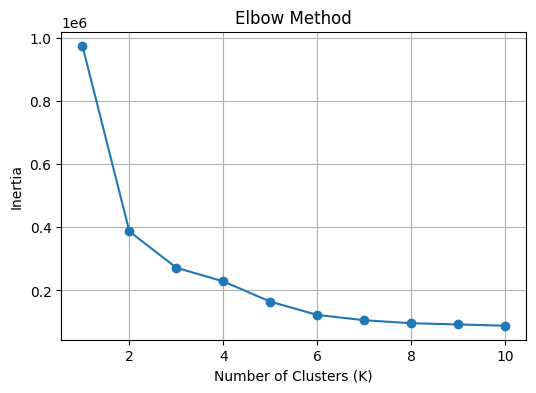

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

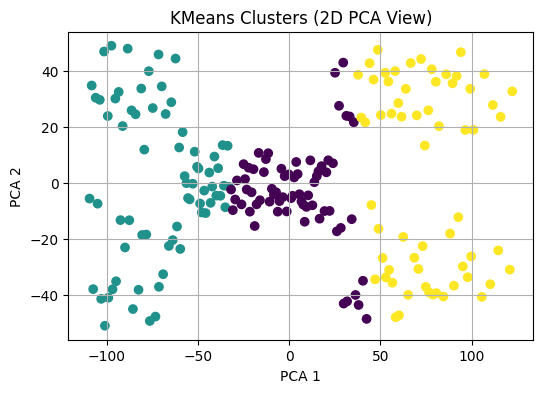

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clusters (2D PCA View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [15]:
score = silhouette_score(X, labels)
print("\nSilhouette Score of the clustering:", round(score, 3))


Silhouette Score of the clustering: 0.371
